# Bar graphs of warming contributions

By: Ty Janoski

Updated: 04.18.2022

## Setup

In [1]:
# import statements
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_format = "jpg"

In [2]:
def get_mean(da,end=None):
    """
    Calculate the mean of a dataarray along the ens axis in
    a certain time range.
    
    Parameters
    ----------
    da : xarray.DataArray
        DataArray with an ens and time dimension.
    end : int
        Index of last time to include.
        
    Returns
    -------
    avg : xarray.DataArray
        DataArray averaged over ens and time dimensions.
    """
    if('ens' in da.dims):
        avg = da.isel(time=slice(None,end)).mean(dim=['ens','time'])
    else:
        avg = da.isel(time=slice(None,end)).mean(dim='time')
    return(avg)

In [3]:
def get_spread(da,end=None):
    """
    Calculate the spread of a 95% CI of a dataarray along the ensemble
    axis in a certain time range
    
    Parameters
    ----------
    da : xarray.DataArray
        DataArray with an ens and time dimension.
    end : int
        Index of last time to include.
        
    Returns
    -------
    spread : float
        The distance between the mean and the end points of the CI.
    """
    if('ens' in da.dims):
        n = len(da.ens)
        spread = stats.sem(da.isel(time=slice(None,end)).mean(dim='time')) * stats.t.ppf(0.975,n-1)
    else:
        spread = 0
    return(spread)

## TOA Bar Charts

### Land + Ocean

In [4]:
# january
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.01.arc_'
AHT_arc_jan = xr.open_dataarray(lead+'AHT_expl.nc')
alb_arc_jan = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_arc_jan = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_arc_jan = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_arc_jan = cloud_LW_arc_jan + cloud_SW_arc_jan
Fsfc_arc_jan = xr.open_dataarray(lead+'Fsfc.nc')
lapse_arc_jan = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_arc_jan = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_arc_jan = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_arc_jan = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_arc_jan = q_LW_arc_jan + q_SW_arc_jan

lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.01.glb_'
AHT_glb_jan = xr.open_dataarray(lead+'AHT_expl.nc')
alb_glb_jan = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_glb_jan = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_glb_jan = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_glb_jan = cloud_LW_glb_jan + cloud_SW_glb_jan
Fsfc_glb_jan = xr.open_dataarray(lead+'Fsfc.nc')
lapse_glb_jan = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_glb_jan = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_glb_jan = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_glb_jan = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_glb_jan = q_LW_glb_jan + q_SW_glb_jan

In [5]:
# jul
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.07.arc_'
AHT_arc_jul = xr.open_dataarray(lead+'AHT_expl.nc')
alb_arc_jul = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_arc_jul = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_arc_jul = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_arc_jul = cloud_LW_arc_jul + cloud_SW_arc_jul
Fsfc_arc_jul = xr.open_dataarray(lead+'Fsfc.nc')
lapse_arc_jul = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_arc_jul = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_arc_jul = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_arc_jul = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_arc_jul = q_LW_arc_jul + q_SW_arc_jul

lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.07.glb_'
AHT_glb_jul = xr.open_dataarray(lead+'AHT_expl.nc')
alb_glb_jul = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_glb_jul = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_glb_jul = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_glb_jul = cloud_LW_glb_jul + cloud_SW_glb_jul
Fsfc_glb_jul = xr.open_dataarray(lead+'Fsfc.nc')
lapse_glb_jul = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_glb_jul = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_glb_jul = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_glb_jul = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_glb_jul = q_LW_glb_jul + q_SW_glb_jul

In [6]:
arc_vars_jan = [AHT_arc_jan,alb_arc_jan,cloud_arc_jan,Fsfc_arc_jan,lapse_arc_jan,
            planck_arc_jan,q_arc_jan]
glb_vars_jan = [AHT_glb_jan,alb_glb_jan,cloud_glb_jan,Fsfc_glb_jan,lapse_glb_jan,
           planck_glb_jan,q_glb_jan]
arc_vars_jul = [AHT_arc_jul,alb_arc_jul,cloud_arc_jul,Fsfc_arc_jul,lapse_arc_jul,
            planck_arc_jul,q_arc_jul]
glb_vars_jul = [AHT_glb_jul*0,alb_glb_jul,cloud_glb_jul,Fsfc_glb_jul,lapse_glb_jul,
           planck_glb_jul,q_glb_jul]
labels = ['AHT','alb','cloud',r'F$_{sfc}$','LR','P\'','q']

################FIRST MONTH#########################
end = 31

arc_means_jan_1mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########THREE MONTHS#######################
end = 91

arc_means_jan_3mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_3mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_3mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_3mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_3mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_3mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_3mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_3mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########FIRST YEAR#######################
end = 365

arc_means_jan_1yr = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1yr = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1yr = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1yr = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1yr = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1yr = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1yr = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1yr = [get_spread(g,end=end) for g in glb_vars_jul]

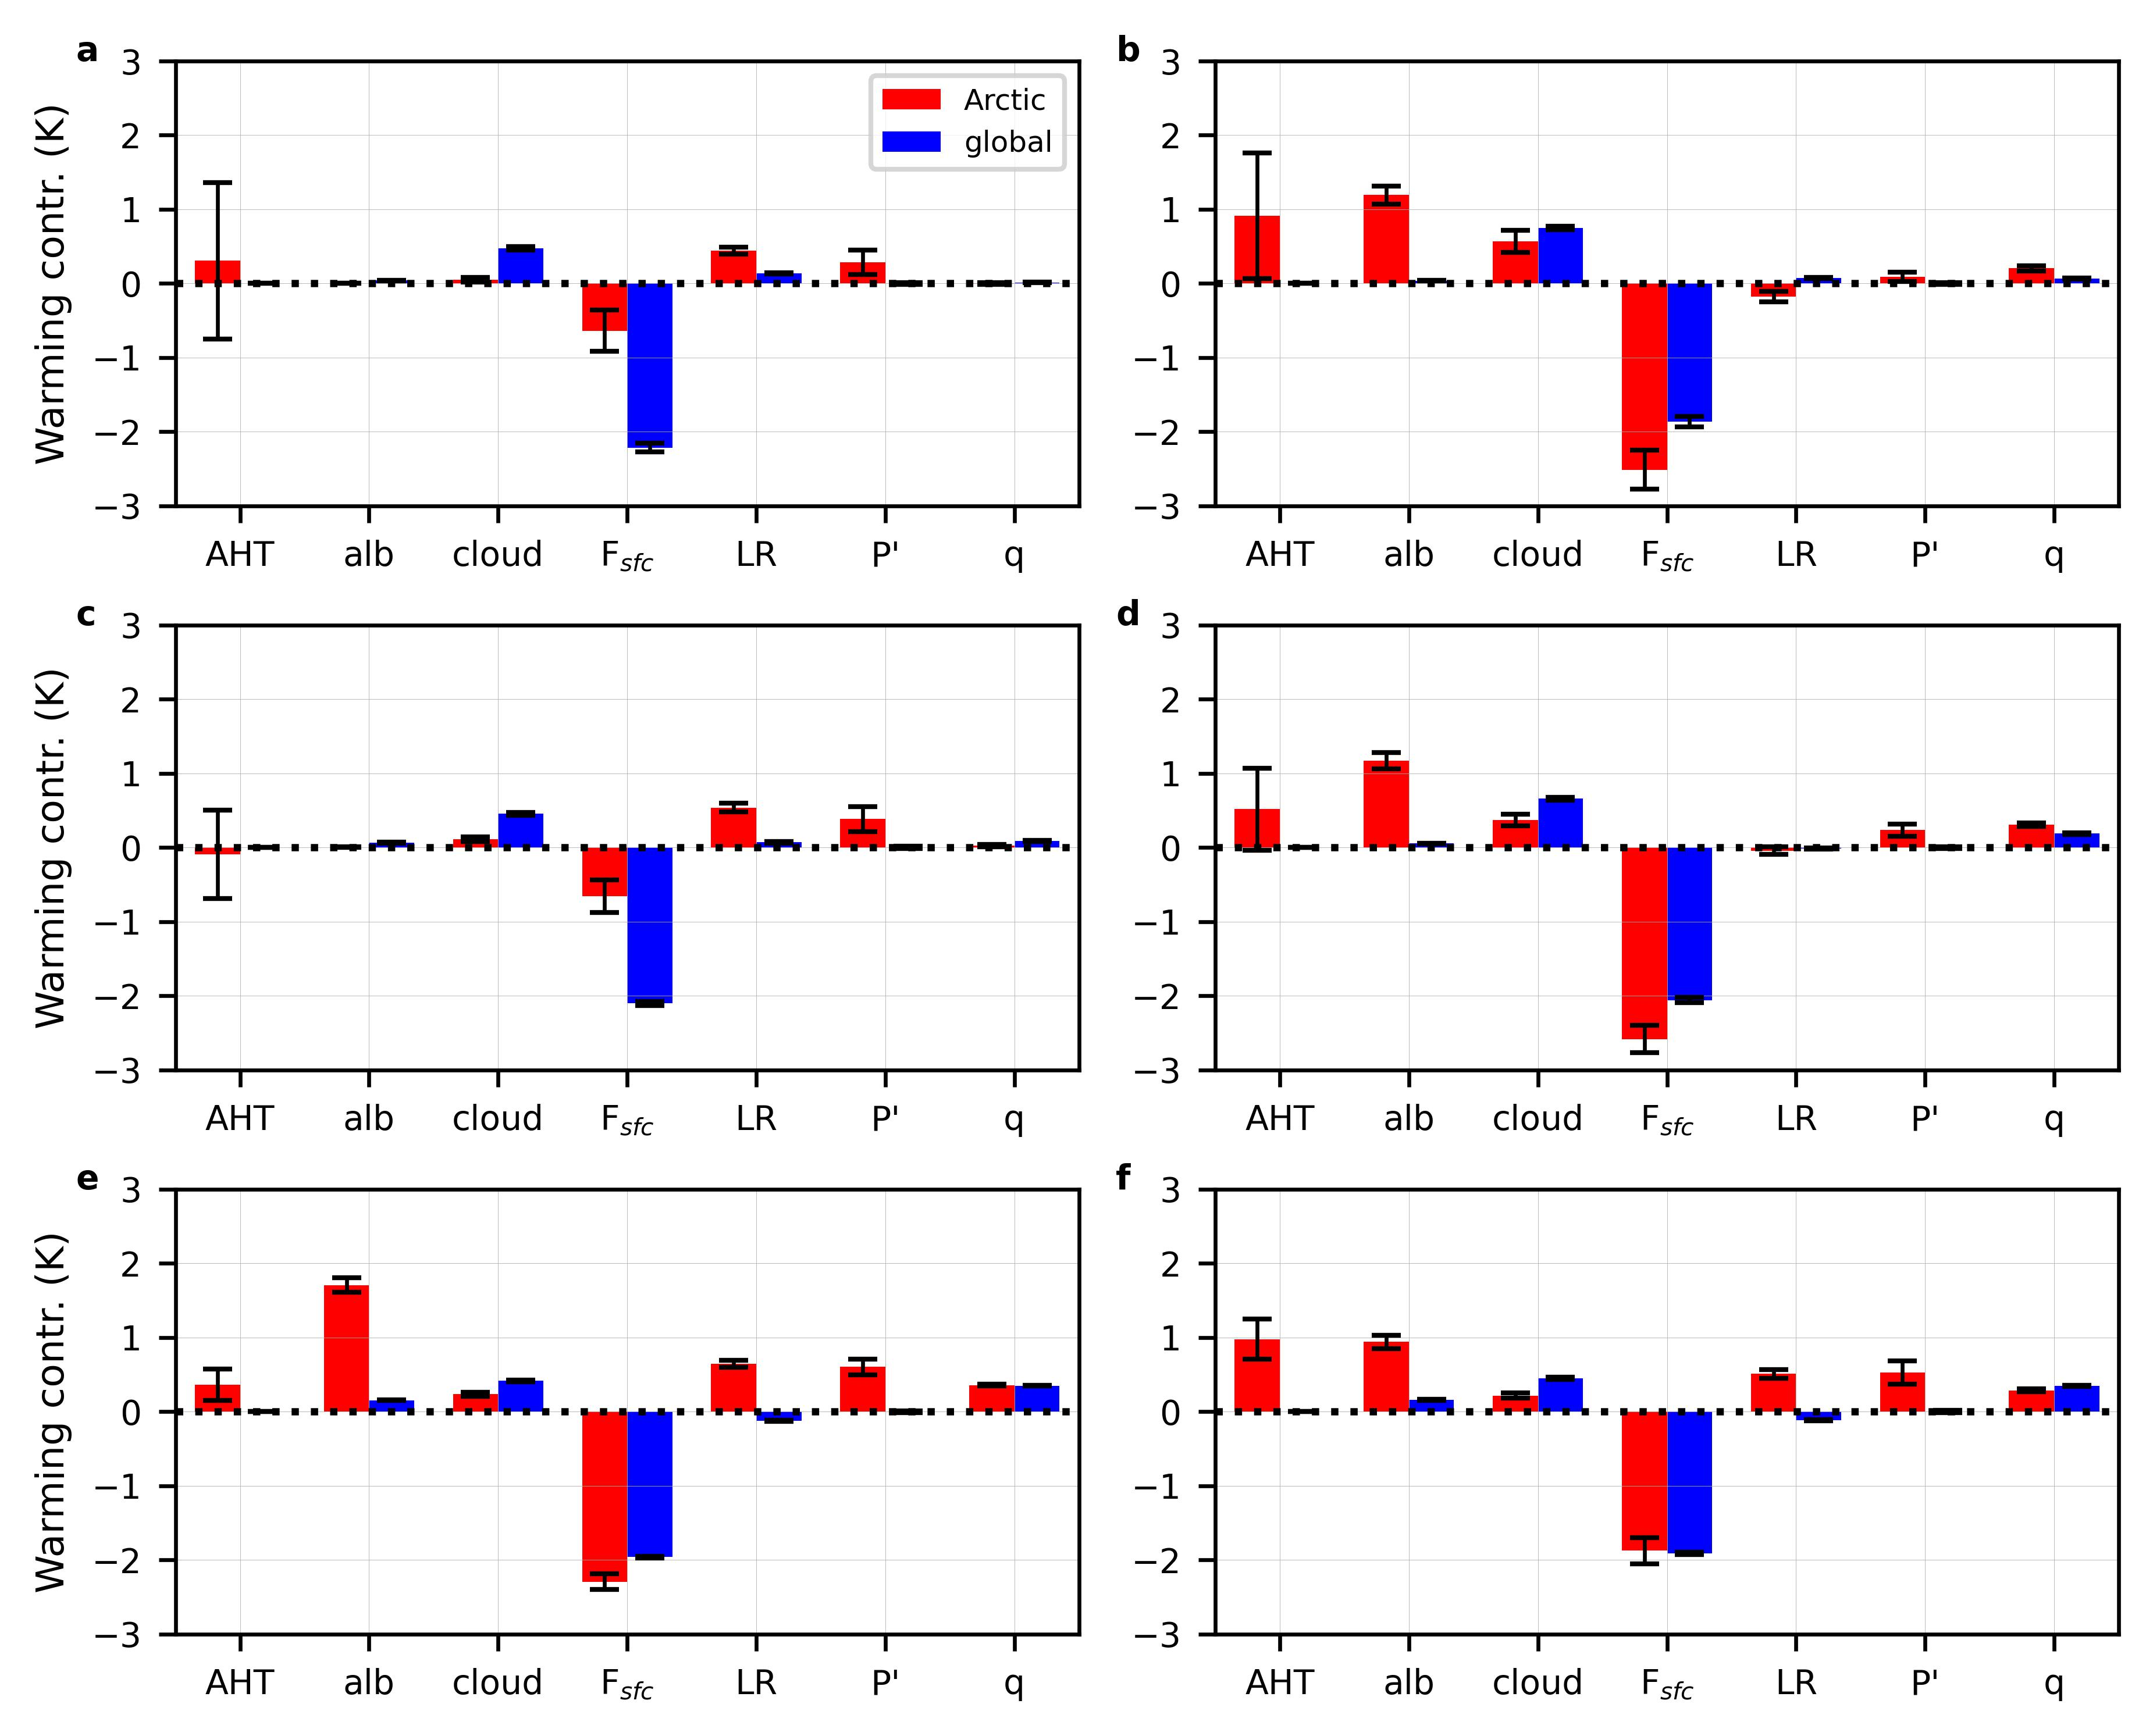

In [7]:
x = np.arange(len(labels))
width=0.35
args={'linewidth':0.8}

fig, axes = plt.subplots(ncols=2,nrows=3,sharey=True,sharex=True,figsize=(6.27,5),dpi=600)
axes[0,0].bar(x - width/2, arc_means_jan_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,0].bar(x + width/2, glb_means_jan_1mo, width, label='global',color='blue',
              yerr=glb_err_jan_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x - width/2, arc_means_jul_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x + width/2, glb_means_jul_1mo, width, label='global',color='blue',
              yerr=glb_err_jul_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x - width/2, arc_means_jan_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x + width/2, glb_means_jan_3mo, width, label='global',color='blue',
              yerr=glb_err_jan_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x - width/2, arc_means_jul_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x + width/2, glb_means_jul_3mo, width, label='global',color='blue',
              yerr=glb_err_jul_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x - width/2, arc_means_jan_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jan_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x + width/2, glb_means_jan_1yr, width, label='global',color='blue',
              yerr=glb_err_jan_1yr,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x - width/2, arc_means_jul_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jul_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x + width/2, glb_means_jul_1yr, width, label='global',color='blue',
              yerr=glb_err_jul_1yr,align='center', ecolor='black', capsize=3,error_kw=args)

axes[0,0].legend(fontsize=6)
axes[0,1].set_xticks(x,labels)

for ax in axes.flatten():
    ax.set_xlim([-0.5,6.5])
    ax.set_ylim([-3,3])
    ax.tick_params(axis='x',labelsize=7)
    ax.tick_params(axis='y',labelsize=7)
    ax.grid(linewidth=0.1)
    ax.tick_params(labelleft=True,labelbottom=True)
    ax.hlines(-0,-0.5,7.5,color='black',linestyle=':')

axes[0,0].set_ylabel('Warming contr. (K)',fontsize=8)
axes[1,0].set_ylabel('Warming contr. (K)',fontsize=8)
axes[2,0].set_ylabel('Warming contr. (K)',fontsize=8)
plt.tight_layout()

letters=['a','b','c','d','e','f']
for i,ax in enumerate(axes.flatten()):
    ax.text(-0.11,1,letters[i],transform=ax.transAxes,fontsize=7,fontweight='bold')

# plt.savefig('Fig6_land&ocean_bar_chart.jpg',dpi=600,bbox_inches='tight')
plt.show()

### Land only

In [8]:
# january
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/land_only/b40.1850.cam5-lens.01.arc_'
AHT_arc_jan = xr.open_dataarray(lead+'AHT.nc')
alb_arc_jan = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_arc_jan = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_arc_jan = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_arc_jan = cloud_LW_arc_jan + cloud_SW_arc_jan
Fsfc_arc_jan = xr.open_dataarray(lead+'Fsfc.nc')
lapse_arc_jan = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_arc_jan = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_arc_jan = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_arc_jan = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_arc_jan = q_LW_arc_jan + q_SW_arc_jan

lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.01.glb_'
AHT_glb_jan = xr.open_dataarray(lead+'AHT.nc')
alb_glb_jan = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_glb_jan = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_glb_jan = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_glb_jan = cloud_LW_glb_jan + cloud_SW_glb_jan
Fsfc_glb_jan = xr.open_dataarray(lead+'Fsfc.nc')
lapse_glb_jan = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_glb_jan = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_glb_jan = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_glb_jan = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_glb_jan = q_LW_glb_jan + q_SW_glb_jan

In [9]:
# jul
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/land_only/b40.1850.cam5-lens.07.arc_'
AHT_arc_jul = xr.open_dataarray(lead+'AHT.nc')
alb_arc_jul = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_arc_jul = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_arc_jul = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_arc_jul = cloud_LW_arc_jul + cloud_SW_arc_jul
Fsfc_arc_jul = xr.open_dataarray(lead+'Fsfc.nc')
lapse_arc_jul = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_arc_jul = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_arc_jul = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_arc_jul = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_arc_jul = q_LW_arc_jul + q_SW_arc_jul

lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.07.glb_'
AHT_glb_jul = xr.open_dataarray(lead+'AHT.nc')
alb_glb_jul = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_glb_jul = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_glb_jul = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_glb_jul = cloud_LW_glb_jul + cloud_SW_glb_jul
Fsfc_glb_jul = xr.open_dataarray(lead+'Fsfc.nc')
lapse_glb_jul = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_glb_jul = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_glb_jul = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_glb_jul = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_glb_jul = q_LW_glb_jul + q_SW_glb_jul

In [10]:
arc_vars_jan = [AHT_arc_jan,alb_arc_jan,cloud_arc_jan,Fsfc_arc_jan,lapse_arc_jan,
            planck_arc_jan,q_arc_jan]
glb_vars_jan = [AHT_glb_jan*0,alb_glb_jan,cloud_glb_jan,Fsfc_glb_jan,lapse_glb_jan,
           planck_glb_jan,q_glb_jan]
arc_vars_jul = [AHT_arc_jul,alb_arc_jul,cloud_arc_jul,Fsfc_arc_jul,lapse_arc_jul,
            planck_arc_jul,q_arc_jul]
glb_vars_jul = [AHT_glb_jul*0,alb_glb_jul,cloud_glb_jul,Fsfc_glb_jul,lapse_glb_jul,
           planck_glb_jul,q_glb_jul]
labels = ['AHT','alb','cloud',r'F$_{sfc}$','LR','P\'','q']

################FIRST MONTH#########################
end = 31

arc_means_jan_1mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########THREE MONTHS#######################
end = 91

arc_means_jan_3mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_3mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_3mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_3mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_3mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_3mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_3mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_3mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########FIRST YEAR#######################
end = 365

arc_means_jan_1yr = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1yr = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1yr = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1yr = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1yr = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1yr = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1yr = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1yr = [get_spread(g,end=end) for g in glb_vars_jul]

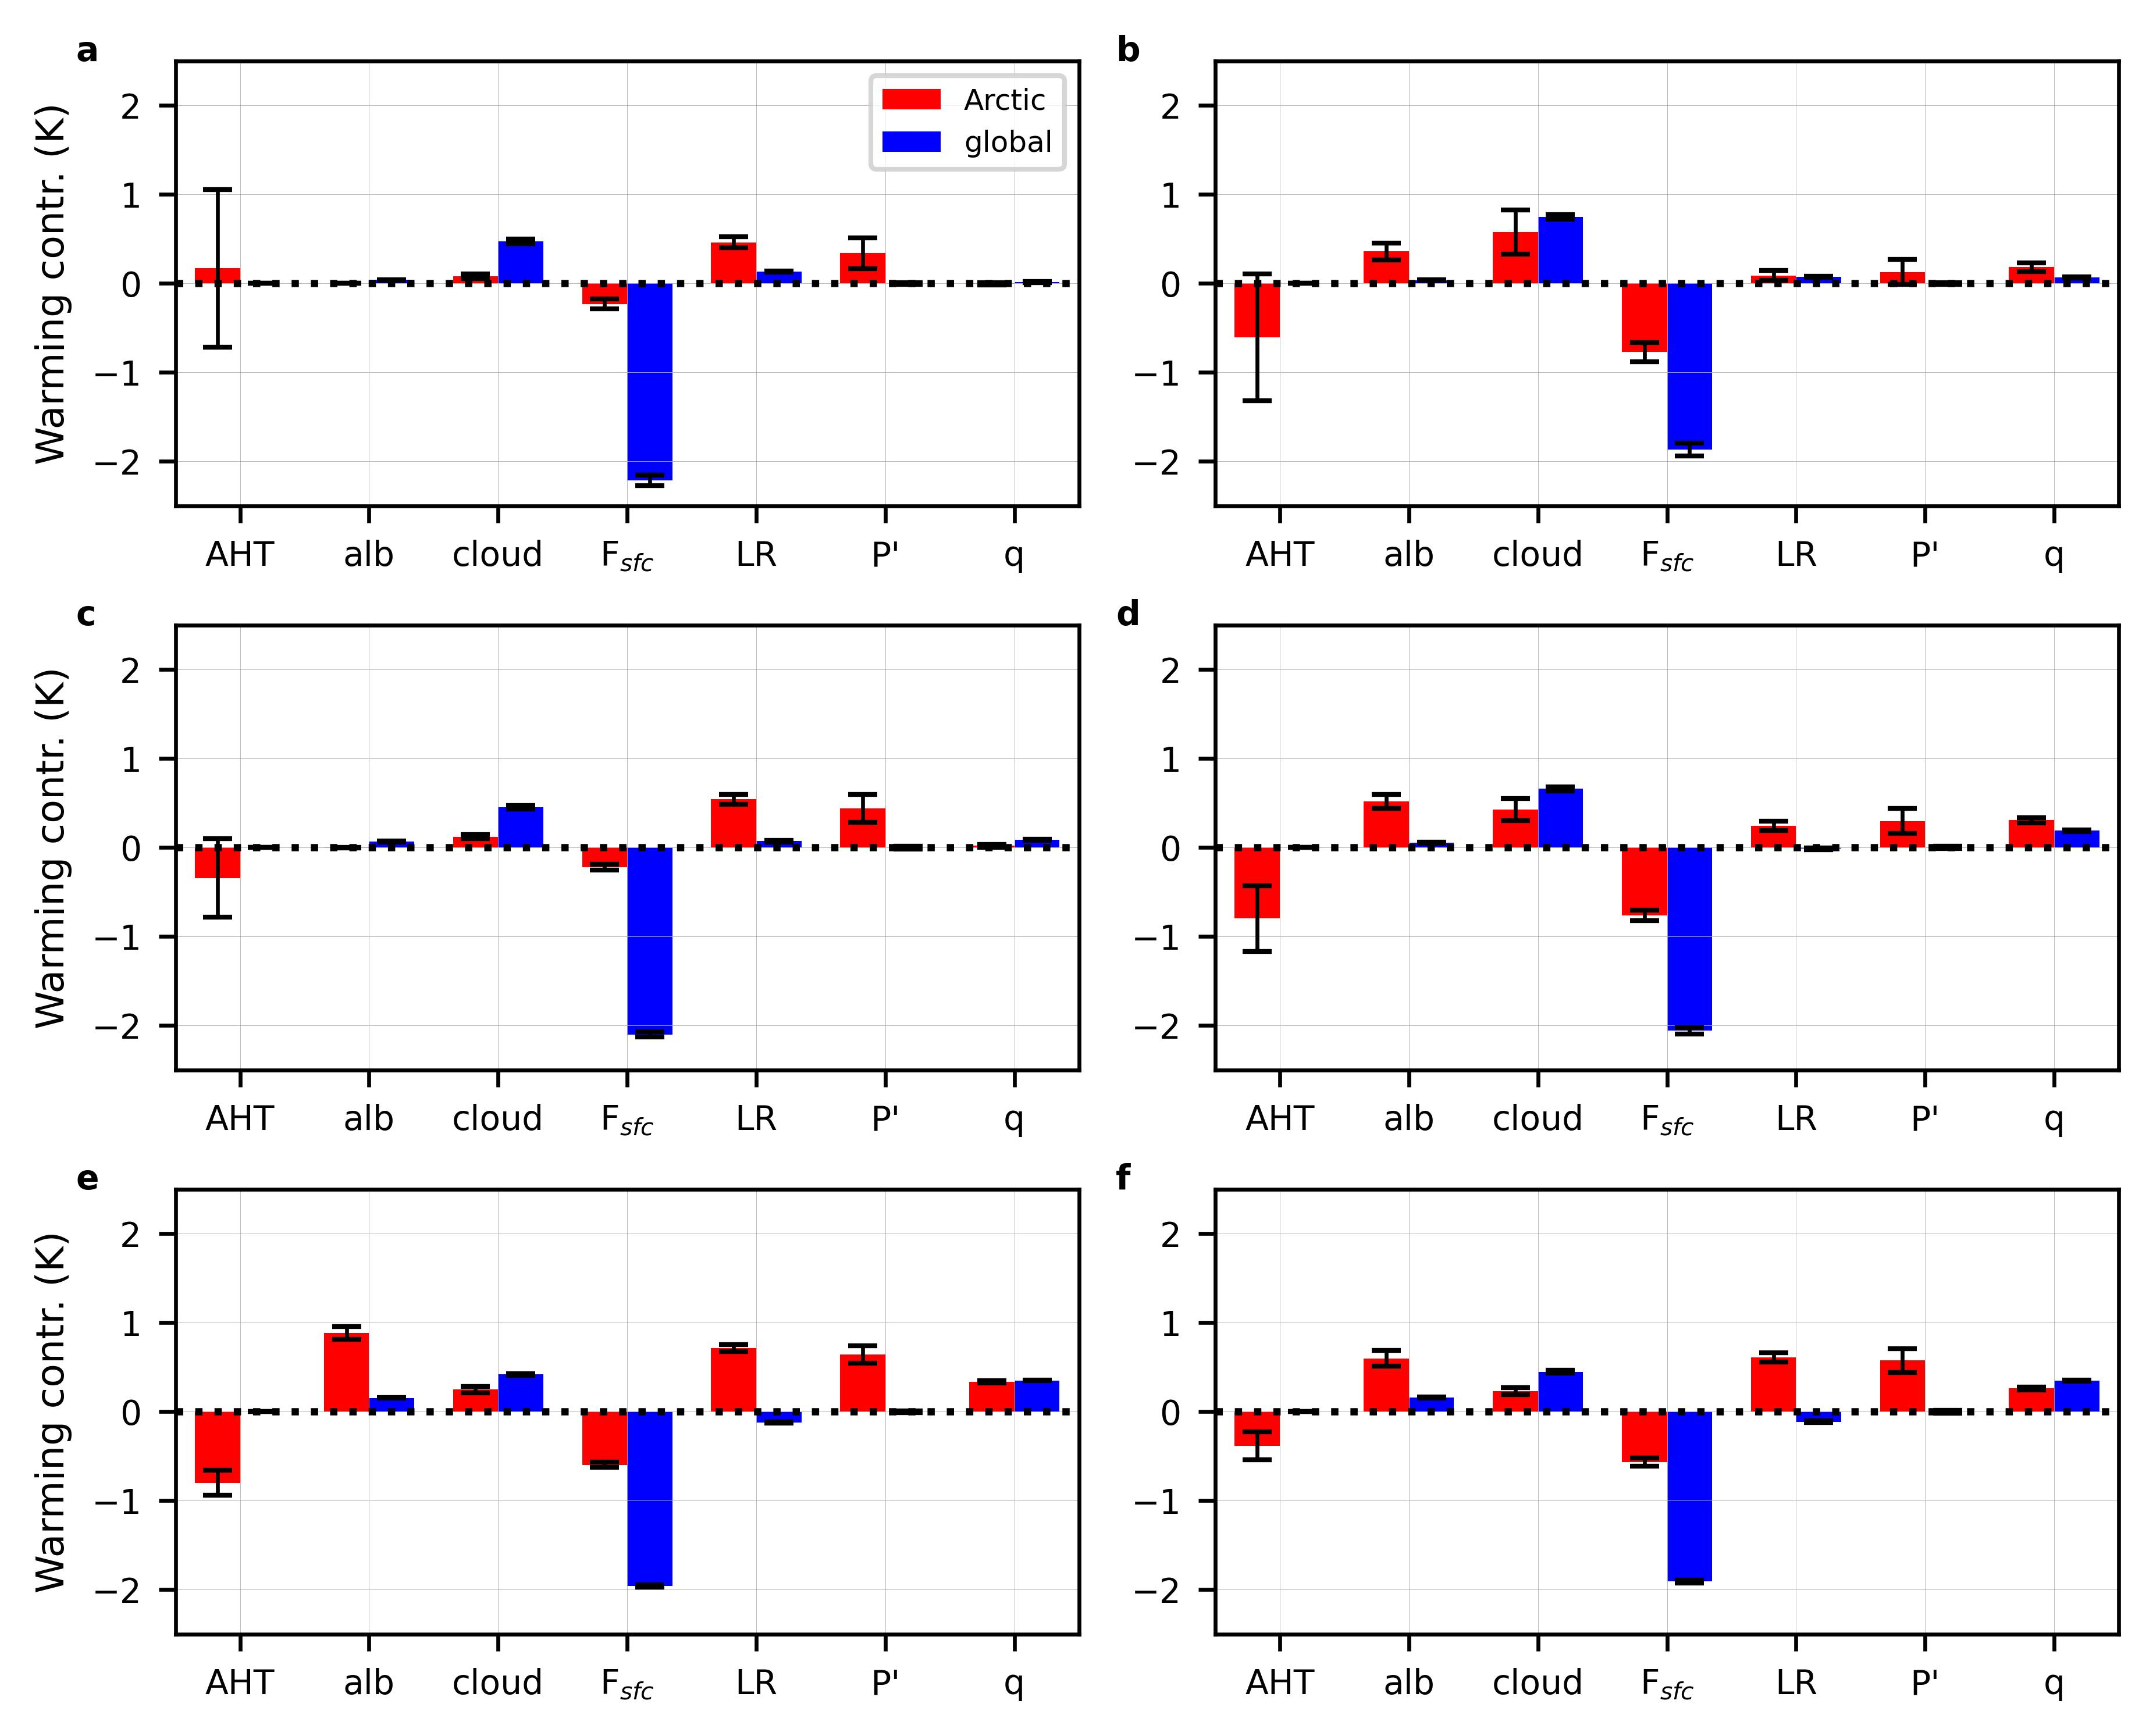

In [12]:
x = np.arange(len(labels))
width=0.35
args={'linewidth':0.8}

fig, axes = plt.subplots(ncols=2,nrows=3,sharey=True,sharex=True,figsize=(6.27,5),dpi=600)
axes[0,0].bar(x - width/2, arc_means_jan_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,0].bar(x + width/2, glb_means_jan_1mo, width, label='global',color='blue',
              yerr=glb_err_jan_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x - width/2, arc_means_jul_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x + width/2, glb_means_jul_1mo, width, label='global',color='blue',
              yerr=glb_err_jul_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x - width/2, arc_means_jan_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x + width/2, glb_means_jan_3mo, width, label='global',color='blue',
              yerr=glb_err_jan_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x - width/2, arc_means_jul_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x + width/2, glb_means_jul_3mo, width, label='global',color='blue',
              yerr=glb_err_jul_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x - width/2, arc_means_jan_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jan_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x + width/2, glb_means_jan_1yr, width, label='global',color='blue',
              yerr=glb_err_jan_1yr,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x - width/2, arc_means_jul_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jul_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x + width/2, glb_means_jul_1yr, width, label='global',color='blue',
              yerr=glb_err_jul_1yr,align='center', ecolor='black', capsize=3,error_kw=args)

axes[0,0].legend(fontsize=6)
axes[0,1].set_xticks(x,labels)

for ax in axes.flatten():
    ax.set_xlim([-0.5,6.5])
    ax.set_ylim([-2.5,2.5])
    ax.tick_params(axis='x',labelsize=7)
    ax.tick_params(axis='y',labelsize=7)
    ax.grid(linewidth=0.1)
    ax.tick_params(labelleft=True,labelbottom=True)
    ax.hlines(-0,-0.5,7.5,color='black',linestyle=':')

axes[0,0].set_ylabel('Warming contr. (K)',fontsize=8)
axes[1,0].set_ylabel('Warming contr. (K)',fontsize=8)
axes[2,0].set_ylabel('Warming contr. (K)',fontsize=8)
plt.tight_layout()

letters=['a','b','c','d','e','f']
for i,ax in enumerate(axes.flatten()):
    ax.text(-0.11,1,letters[i],transform=ax.transAxes,fontsize=7,fontweight='bold')

plt.savefig('Fig7_land_only_bar_chart.jpg',dpi=600,bbox_inches='tight')
plt.show()

### Ocean only

In [13]:
# january
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/ocean_only/b40.1850.cam5-lens.01.arc_'
AHT_arc_jan = xr.open_dataarray(lead+'AHT.nc')
alb_arc_jan = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_arc_jan = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_arc_jan = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_arc_jan = cloud_LW_arc_jan + cloud_SW_arc_jan
Fsfc_arc_jan = xr.open_dataarray(lead+'Fsfc.nc')
lapse_arc_jan = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_arc_jan = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_arc_jan = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_arc_jan = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_arc_jan = q_LW_arc_jan + q_SW_arc_jan

lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.01.glb_'
AHT_glb_jan = xr.open_dataarray(lead+'AHT.nc')
alb_glb_jan = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_glb_jan = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_glb_jan = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_glb_jan = cloud_LW_glb_jan + cloud_SW_glb_jan
Fsfc_glb_jan = xr.open_dataarray(lead+'Fsfc.nc')
lapse_glb_jan = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_glb_jan = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_glb_jan = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_glb_jan = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_glb_jan = q_LW_glb_jan + q_SW_glb_jan

In [14]:
# jul
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/ocean_only/b40.1850.cam5-lens.07.arc_'
AHT_arc_jul = xr.open_dataarray(lead+'AHT.nc')
alb_arc_jul = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_arc_jul = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_arc_jul = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_arc_jul = cloud_LW_arc_jul + cloud_SW_arc_jul
Fsfc_arc_jul = xr.open_dataarray(lead+'Fsfc.nc')
lapse_arc_jul = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_arc_jul = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_arc_jul = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_arc_jul = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_arc_jul = q_LW_arc_jul + q_SW_arc_jul

lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.07.glb_'
AHT_glb_jul = xr.open_dataarray(lead+'AHT.nc')
alb_glb_jul = xr.open_dataarray(lead+'alb_TOA.nc')
cloud_LW_glb_jul = xr.open_dataarray(lead+'cloud_LW_TOA.nc')
cloud_SW_glb_jul = xr.open_dataarray(lead+'cloud_SW_TOA.nc')
cloud_glb_jul = cloud_LW_glb_jul + cloud_SW_glb_jul
Fsfc_glb_jul = xr.open_dataarray(lead+'Fsfc.nc')
lapse_glb_jul = xr.open_dataarray(lead+'lapse_tropo_TOA.nc')
planck_glb_jul = xr.open_dataarray(lead+'planck_tropo_TOA.nc')
q_LW_glb_jul = xr.open_dataarray(lead+'q_LW_tropo_TOA.nc')
q_SW_glb_jul = xr.open_dataarray(lead+'q_SW_tropo_TOA.nc')
q_glb_jul = q_LW_glb_jul + q_SW_glb_jul

In [15]:
arc_vars_jan = [AHT_arc_jan,alb_arc_jan,cloud_arc_jan,Fsfc_arc_jan,lapse_arc_jan,
            planck_arc_jan,q_arc_jan]
glb_vars_jan = [AHT_glb_jan*0,alb_glb_jan,cloud_glb_jan,Fsfc_glb_jan,lapse_glb_jan,
           planck_glb_jan,q_glb_jan]
arc_vars_jul = [AHT_arc_jul,alb_arc_jul,cloud_arc_jul,Fsfc_arc_jul,lapse_arc_jul,
            planck_arc_jul,q_arc_jul]
glb_vars_jul = [AHT_glb_jul*0,alb_glb_jul,cloud_glb_jul,Fsfc_glb_jul,lapse_glb_jul,
           planck_glb_jul,q_glb_jul]
labels = ['AHT','alb','cloud',r'F$_{sfc}$','LR','P\'','q']

################FIRST MONTH#########################
end = 31

arc_means_jan_1mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########THREE MONTHS#######################
end = 91

arc_means_jan_3mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_3mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_3mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_3mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_3mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_3mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_3mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_3mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########FIRST YEAR#######################
end = 365

arc_means_jan_1yr = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1yr = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1yr = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1yr = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1yr = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1yr = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1yr = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1yr = [get_spread(g,end=end) for g in glb_vars_jul]

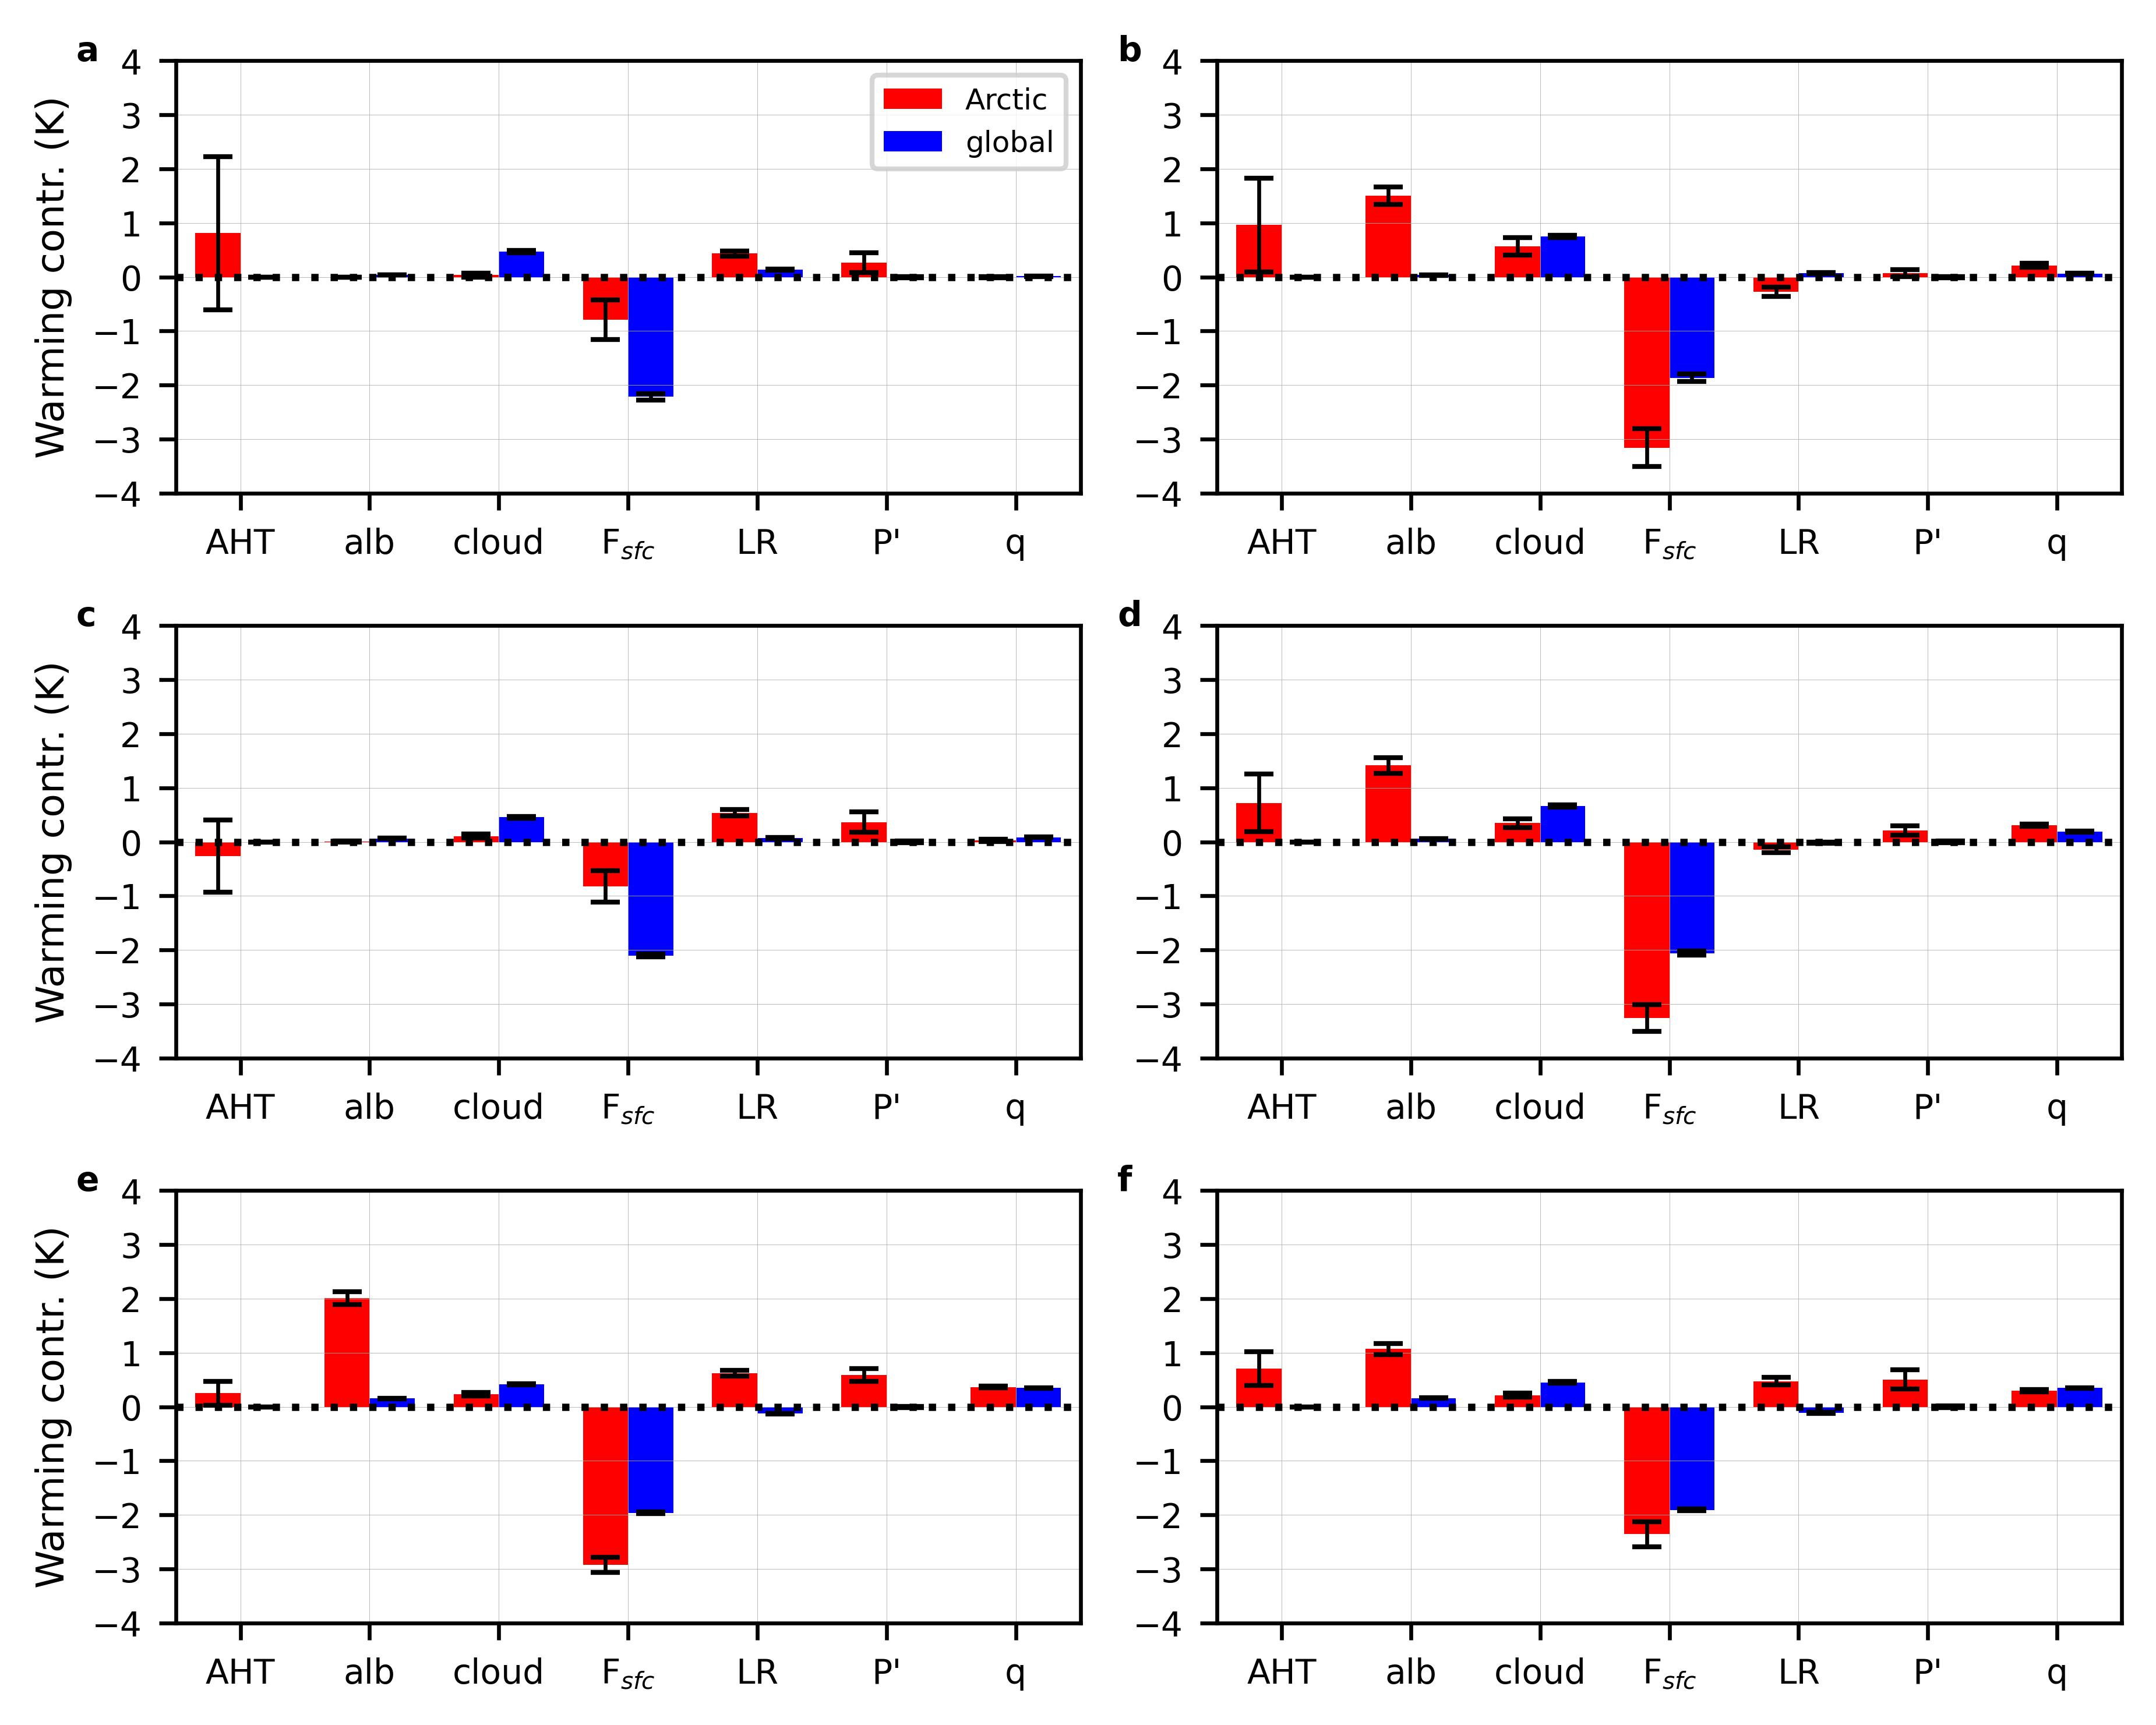

In [16]:
x = np.arange(len(labels))
width=0.35
args={'linewidth':0.8}

fig, axes = plt.subplots(ncols=2,nrows=3,sharey=True,sharex=True,figsize=(6.27,5),dpi=600)
axes[0,0].bar(x - width/2, arc_means_jan_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,0].bar(x + width/2, glb_means_jan_1mo, width, label='global',color='blue',
              yerr=glb_err_jan_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x - width/2, arc_means_jul_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x + width/2, glb_means_jul_1mo, width, label='global',color='blue',
              yerr=glb_err_jul_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x - width/2, arc_means_jan_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x + width/2, glb_means_jan_3mo, width, label='global',color='blue',
              yerr=glb_err_jan_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x - width/2, arc_means_jul_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x + width/2, glb_means_jul_3mo, width, label='global',color='blue',
              yerr=glb_err_jul_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x - width/2, arc_means_jan_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jan_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x + width/2, glb_means_jan_1yr, width, label='global',color='blue',
              yerr=glb_err_jan_1yr,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x - width/2, arc_means_jul_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jul_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x + width/2, glb_means_jul_1yr, width, label='global',color='blue',
              yerr=glb_err_jul_1yr,align='center', ecolor='black', capsize=3,error_kw=args)

axes[0,0].legend(fontsize=6)
axes[0,1].set_xticks(x,labels)

for ax in axes.flatten():
    ax.set_xlim([-0.5,6.5])
    ax.set_ylim([-4,4])
    ax.set_yticks(np.arange(-4,5,1))
    ax.tick_params(axis='x',labelsize=7)
    ax.tick_params(axis='y',labelsize=7)
    ax.grid(linewidth=0.1)
    ax.tick_params(labelleft=True,labelbottom=True)
    ax.hlines(-0,-0.5,7.5,color='black',linestyle=':')

axes[0,0].set_ylabel('Warming contr. (K)',fontsize=8)
axes[1,0].set_ylabel('Warming contr. (K)',fontsize=8)
axes[2,0].set_ylabel('Warming contr. (K)',fontsize=8)
plt.tight_layout()

letters=['a','b','c','d','e','f']
for i,ax in enumerate(axes.flatten()):
    ax.text(-0.11,1,letters[i],transform=ax.transAxes,fontsize=7,fontweight='bold')

plt.savefig('Fig8_ocean_only_bar_chart.jpg',dpi=600,bbox_inches='tight')
plt.show()

## Sfc bar charts

### Land & Ocean

In [16]:
# january
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.01.arc_'
alb_arc_jan = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_arc_jan = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_arc_jan = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_arc_jan = cloud_LW_arc_jan + cloud_SW_arc_jan
lh_arc_jan = xr.open_dataarray(lead+'dLHFLX.nc')
Fsfc_arc_jan = xr.open_dataarray(lead+'Fsfc.nc')
Ta_arc_jan = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_arc_jan = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_arc_jan = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_arc_jan = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_arc_jan = q_LW_arc_jan + q_SW_arc_jan
sh_arc_jan = xr.open_dataarray(lead+'dSHFLX.nc')

# january
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.01.glb_'
alb_glb_jan = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_glb_jan = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_glb_jan = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_glb_jan = cloud_LW_glb_jan + cloud_SW_glb_jan
Fsfc_glb_jan = xr.open_dataarray(lead+'Fsfc.nc')
lh_glb_jan = xr.open_dataarray(lead+'dLHFLX.nc')
Ta_glb_jan = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_glb_jan = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_glb_jan = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_glb_jan = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_glb_jan = q_LW_glb_jan + q_SW_glb_jan
sh_glb_jan = xr.open_dataarray(lead+'dSHFLX.nc')

In [17]:
# july
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.07.arc_'
alb_arc_jul = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_arc_jul = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_arc_jul = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_arc_jul = cloud_LW_arc_jul + cloud_SW_arc_jul
Fsfc_arc_jul = xr.open_dataarray(lead+'Fsfc.nc')
lh_arc_jul = xr.open_dataarray(lead+'dLHFLX.nc')
Ta_arc_jul = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_arc_jul = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_arc_jul = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_arc_jul = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_arc_jul = q_LW_arc_jul + q_SW_arc_jul
sh_arc_jul = xr.open_dataarray(lead+'dSHFLX.nc')

# july
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.07.glb_'
alb_glb_jul = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_glb_jul = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_glb_jul = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_glb_jul = cloud_LW_glb_jul + cloud_SW_glb_jul
Fsfc_glb_jul = xr.open_dataarray(lead+'Fsfc.nc')
lh_glb_jul = xr.open_dataarray(lead+'dLHFLX.nc')
Ta_glb_jul = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_glb_jul = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_glb_jul = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_glb_jul = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_glb_jul = q_LW_glb_jul + q_SW_glb_jul
sh_glb_jul = xr.open_dataarray(lead+'dSHFLX.nc')

In [18]:
arc_vars_jan = [alb_arc_jan,cloud_arc_jan,Ta_arc_jan,Ts_arc_jan,
               q_arc_jan,lh_arc_jan,sh_arc_jan]
glb_vars_jan = [alb_glb_jan,cloud_glb_jan,Ta_glb_jan,Ts_glb_jan,
               q_glb_jan,lh_glb_jan,sh_glb_jan]
arc_vars_jul = [alb_arc_jul,cloud_arc_jul,Ta_arc_jul,Ts_arc_jul,
               q_arc_jul,lh_arc_jul,sh_arc_jul]
glb_vars_jul = [alb_glb_jul,cloud_glb_jul,Ta_glb_jul,Ts_glb_jul,
               q_glb_jul,lh_glb_jul,sh_glb_jul]
labels = ['alb','cloud','Ta','Ts','q',r'F$_{LH}$',r'F$_{SH}$']

################FIRST MONTH#########################
end = 31

arc_means_jan_1mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########THREE MONTHS#######################
end = 91

arc_means_jan_3mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_3mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_3mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_3mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_3mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_3mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_3mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_3mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########FIRST YEAR#######################
end = 365

arc_means_jan_1yr = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1yr = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1yr = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1yr = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1yr = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1yr = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1yr = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1yr = [get_spread(g,end=end) for g in glb_vars_jul]

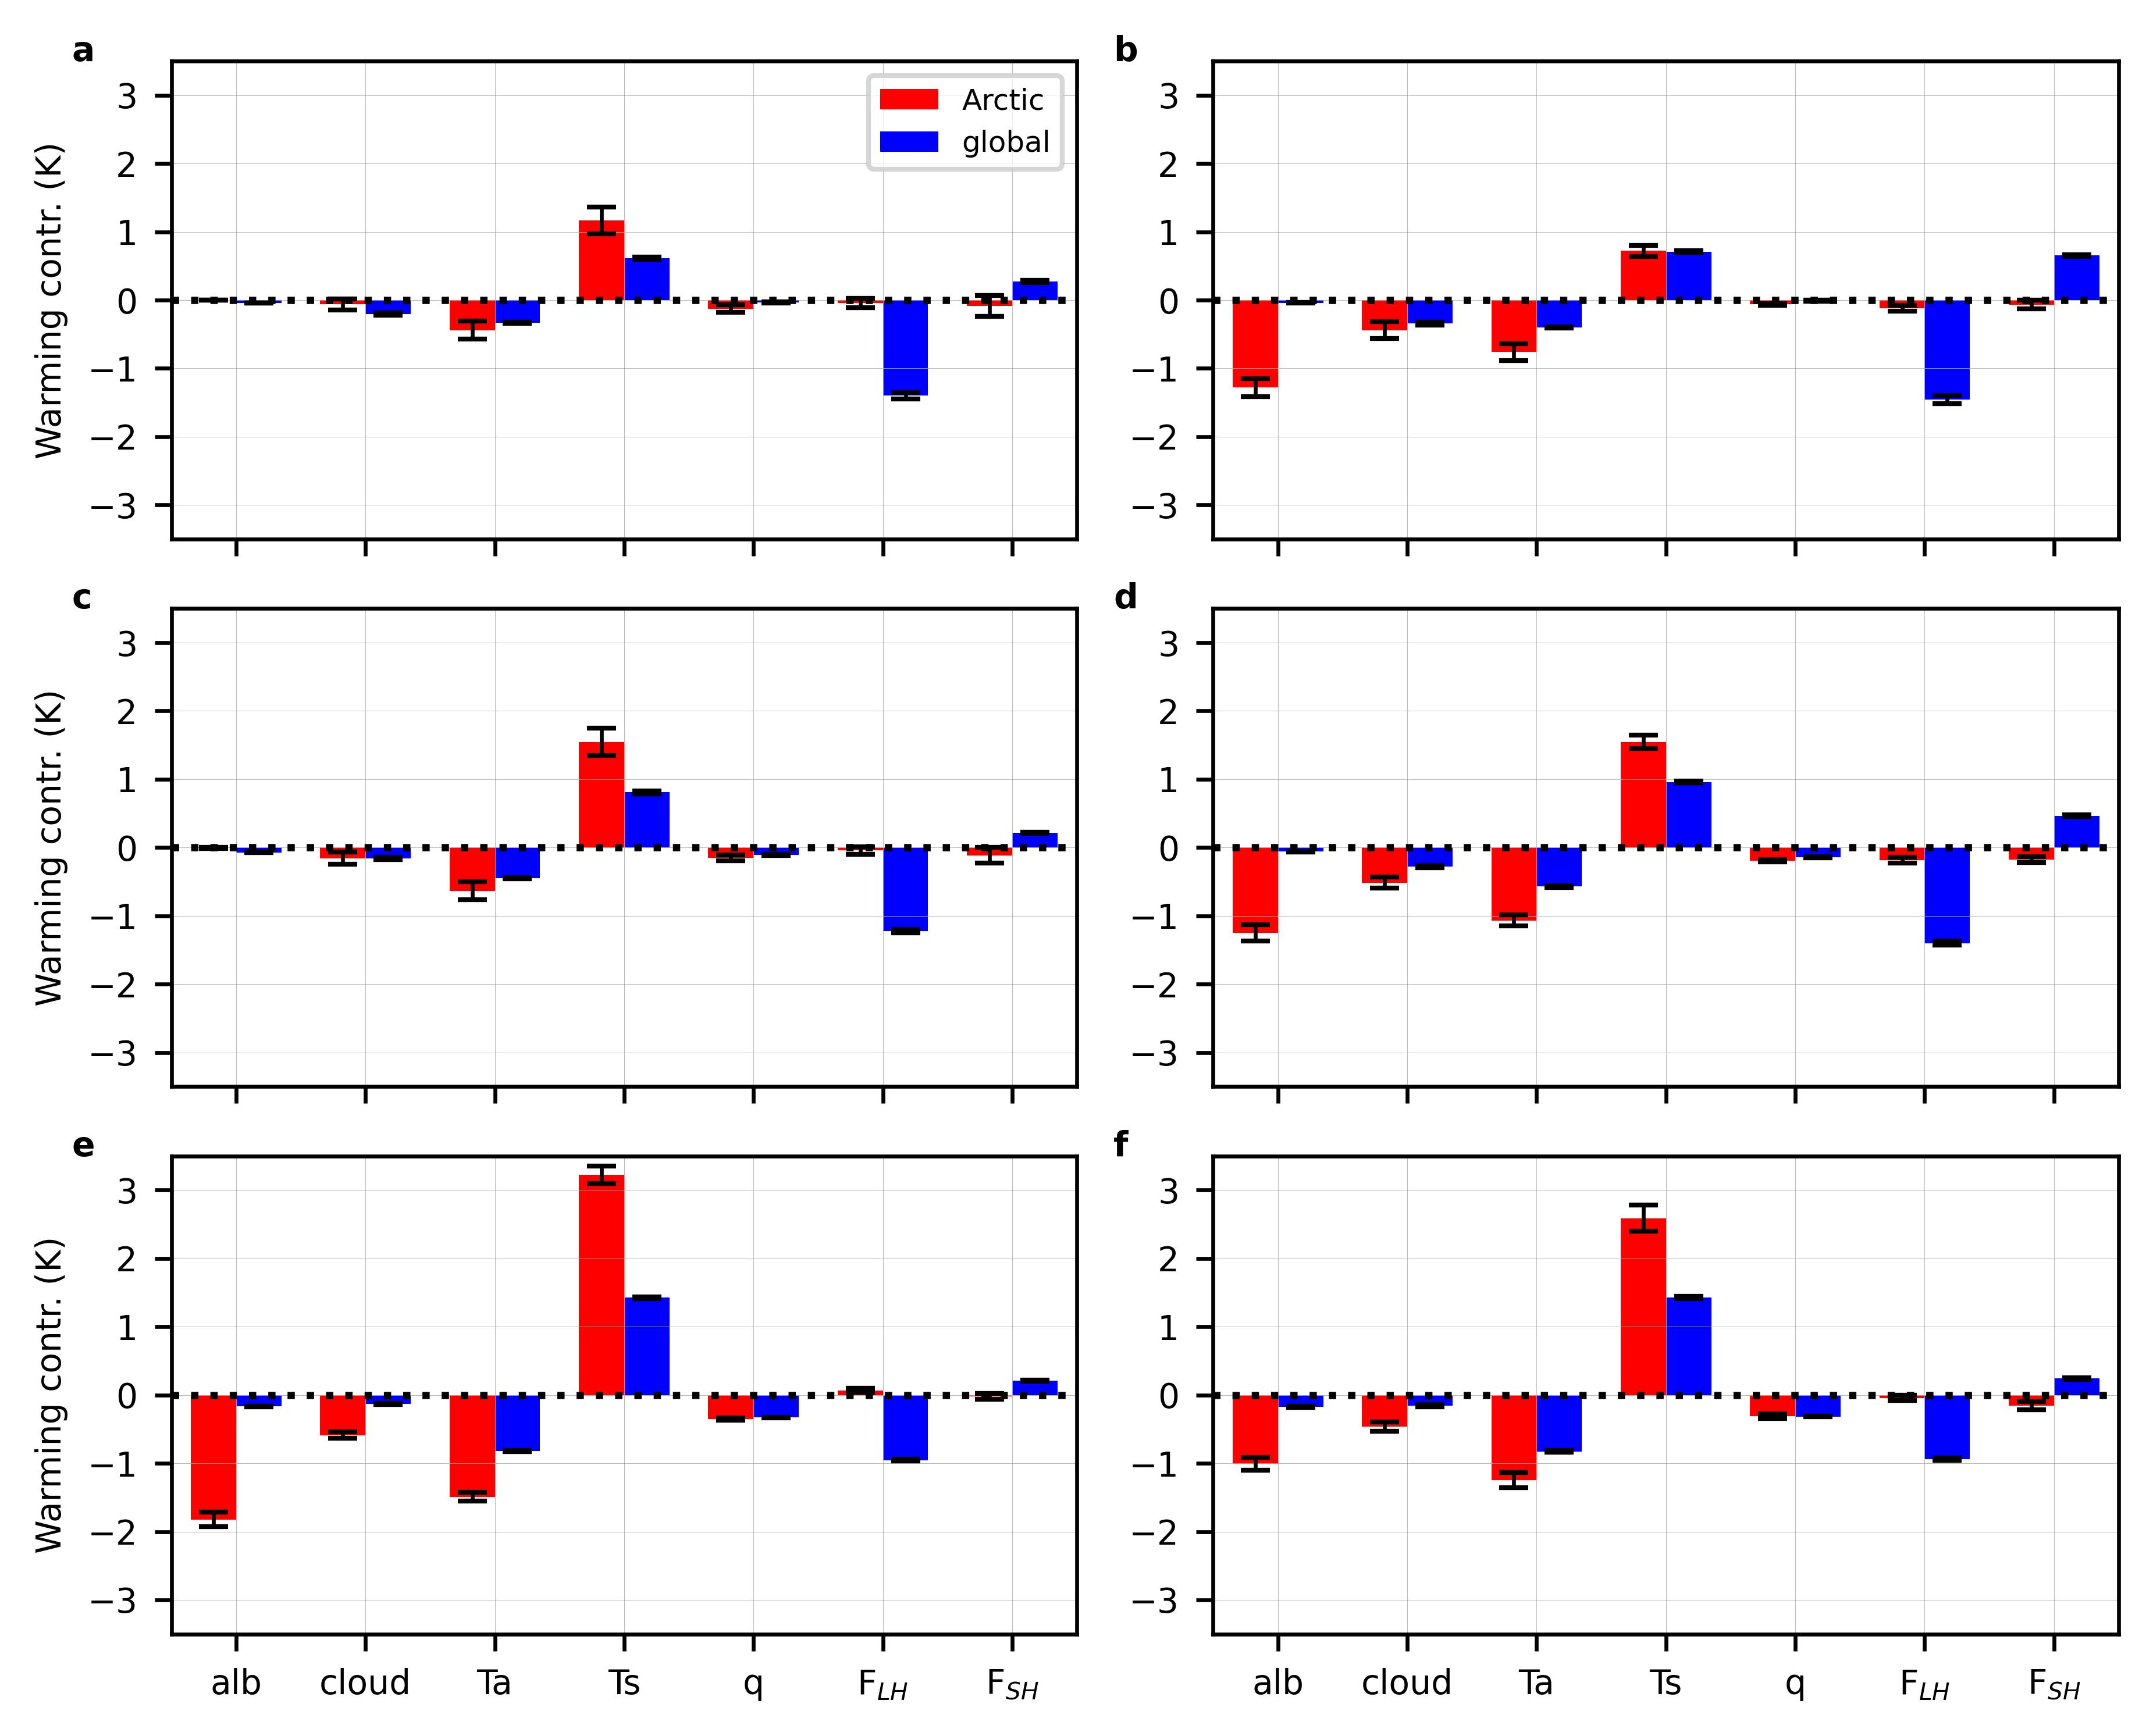

In [21]:
x = np.arange(len(labels))
width=0.35
args={'linewidth':0.8}

fig, axes = plt.subplots(ncols=2,nrows=3,sharey=True,sharex=True,figsize=(6.27,5),dpi=600)
axes[0,0].bar(x - width/2, arc_means_jan_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,0].bar(x + width/2, glb_means_jan_1mo, width, label='global',color='blue',
              yerr=glb_err_jan_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x - width/2, arc_means_jul_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x + width/2, glb_means_jul_1mo, width, label='global',color='blue',
              yerr=glb_err_jul_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x - width/2, arc_means_jan_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x + width/2, glb_means_jan_3mo, width, label='global',color='blue',
              yerr=glb_err_jan_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x - width/2, arc_means_jul_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x + width/2, glb_means_jul_3mo, width, label='global',color='blue',
              yerr=glb_err_jul_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x - width/2, arc_means_jan_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jan_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x + width/2, glb_means_jan_1yr, width, label='global',color='blue',
              yerr=glb_err_jan_1yr,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x - width/2, arc_means_jul_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jul_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x + width/2, glb_means_jul_1yr, width, label='global',color='blue',
              yerr=glb_err_jul_1yr,align='center', ecolor='black', capsize=3,error_kw=args)

axes[0,0].legend(fontsize=6)
axes[0,1].set_xticks(x,labels)

for ax in axes.flatten():
    ax.set_xlim([-0.5,6.5])
    ax.set_ylim([-3.5,3.5])
    ax.tick_params(axis='x',labelsize=7)
    ax.tick_params(axis='y',labelsize=7)
    ax.grid(linewidth=0.1)
    ax.tick_params(labelleft=True)
    ax.hlines(-0,-0.5,7.5,color='black',linestyle=':')

axes[0,0].set_ylabel('Warming contr. (K)',fontsize=7)
axes[1,0].set_ylabel('Warming contr. (K)',fontsize=7)
axes[2,0].set_ylabel('Warming contr. (K)',fontsize=7)
plt.tight_layout()

letters=['a','b','c','d','e','f']
for i,ax in enumerate(axes.flatten()):
    ax.text(-0.11,1,letters[i],transform=ax.transAxes,fontsize=7,fontweight='bold')

plt.savefig('FigS6_Fsfc_bar_chart_land&ocean.jpg',dpi=600,bbox_inches='tight')
plt.show()

### Land only

In [22]:
# january
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/land_only/b40.1850.cam5-lens.01.arc_'
alb_arc_jan = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_arc_jan = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_arc_jan = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_arc_jan = cloud_LW_arc_jan + cloud_SW_arc_jan
lh_arc_jan = xr.open_dataarray(lead+'dLHFLX.nc')
Fsfc_arc_jan = xr.open_dataarray(lead+'Fsfc.nc')
Ta_arc_jan = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_arc_jan = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_arc_jan = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_arc_jan = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_arc_jan = q_LW_arc_jan + q_SW_arc_jan
sh_arc_jan = xr.open_dataarray(lead+'dSHFLX.nc')

# january
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.01.glb_'
alb_glb_jan = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_glb_jan = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_glb_jan = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_glb_jan = cloud_LW_glb_jan + cloud_SW_glb_jan
Fsfc_glb_jan = xr.open_dataarray(lead+'Fsfc.nc')
lh_glb_jan = xr.open_dataarray(lead+'dLHFLX.nc')
Ta_glb_jan = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_glb_jan = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_glb_jan = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_glb_jan = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_glb_jan = q_LW_glb_jan + q_SW_glb_jan
sh_glb_jan = xr.open_dataarray(lead+'dSHFLX.nc')

In [23]:
# july
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/land_only/b40.1850.cam5-lens.07.arc_'
alb_arc_jul = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_arc_jul = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_arc_jul = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_arc_jul = cloud_LW_arc_jul + cloud_SW_arc_jul
Fsfc_arc_jul = xr.open_dataarray(lead+'Fsfc.nc')
lh_arc_jul = xr.open_dataarray(lead+'dLHFLX.nc')
Ta_arc_jul = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_arc_jul = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_arc_jul = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_arc_jul = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_arc_jul = q_LW_arc_jul + q_SW_arc_jul
sh_arc_jul = xr.open_dataarray(lead+'dSHFLX.nc')

# july
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.07.glb_'
alb_glb_jul = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_glb_jul = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_glb_jul = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_glb_jul = cloud_LW_glb_jul + cloud_SW_glb_jul
Fsfc_glb_jul = xr.open_dataarray(lead+'Fsfc.nc')
lh_glb_jul = xr.open_dataarray(lead+'dLHFLX.nc')
Ta_glb_jul = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_glb_jul = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_glb_jul = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_glb_jul = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_glb_jul = q_LW_glb_jul + q_SW_glb_jul
sh_glb_jul = xr.open_dataarray(lead+'dSHFLX.nc')

In [24]:
arc_vars_jan = [alb_arc_jan,cloud_arc_jan,Ta_arc_jan,Ts_arc_jan,
               q_arc_jan,lh_arc_jan,sh_arc_jan]
glb_vars_jan = [alb_glb_jan,cloud_glb_jan,Ta_glb_jan,Ts_glb_jan,
               q_glb_jan,lh_glb_jan,sh_glb_jan]
arc_vars_jul = [alb_arc_jul,cloud_arc_jul,Ta_arc_jul,Ts_arc_jul,
               q_arc_jul,lh_arc_jul,sh_arc_jul]
glb_vars_jul = [alb_glb_jul,cloud_glb_jul,Ta_glb_jul,Ts_glb_jul,
               q_glb_jul,lh_glb_jul,sh_glb_jul]
labels = ['alb','cloud','Ta','Ts','q',r'F$_{LH}$',r'F$_{SH}$']

################FIRST MONTH#########################
end = 31

arc_means_jan_1mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########THREE MONTHS#######################
end = 91

arc_means_jan_3mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_3mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_3mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_3mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_3mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_3mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_3mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_3mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########FIRST YEAR#######################
end = 365

arc_means_jan_1yr = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1yr = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1yr = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1yr = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1yr = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1yr = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1yr = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1yr = [get_spread(g,end=end) for g in glb_vars_jul]

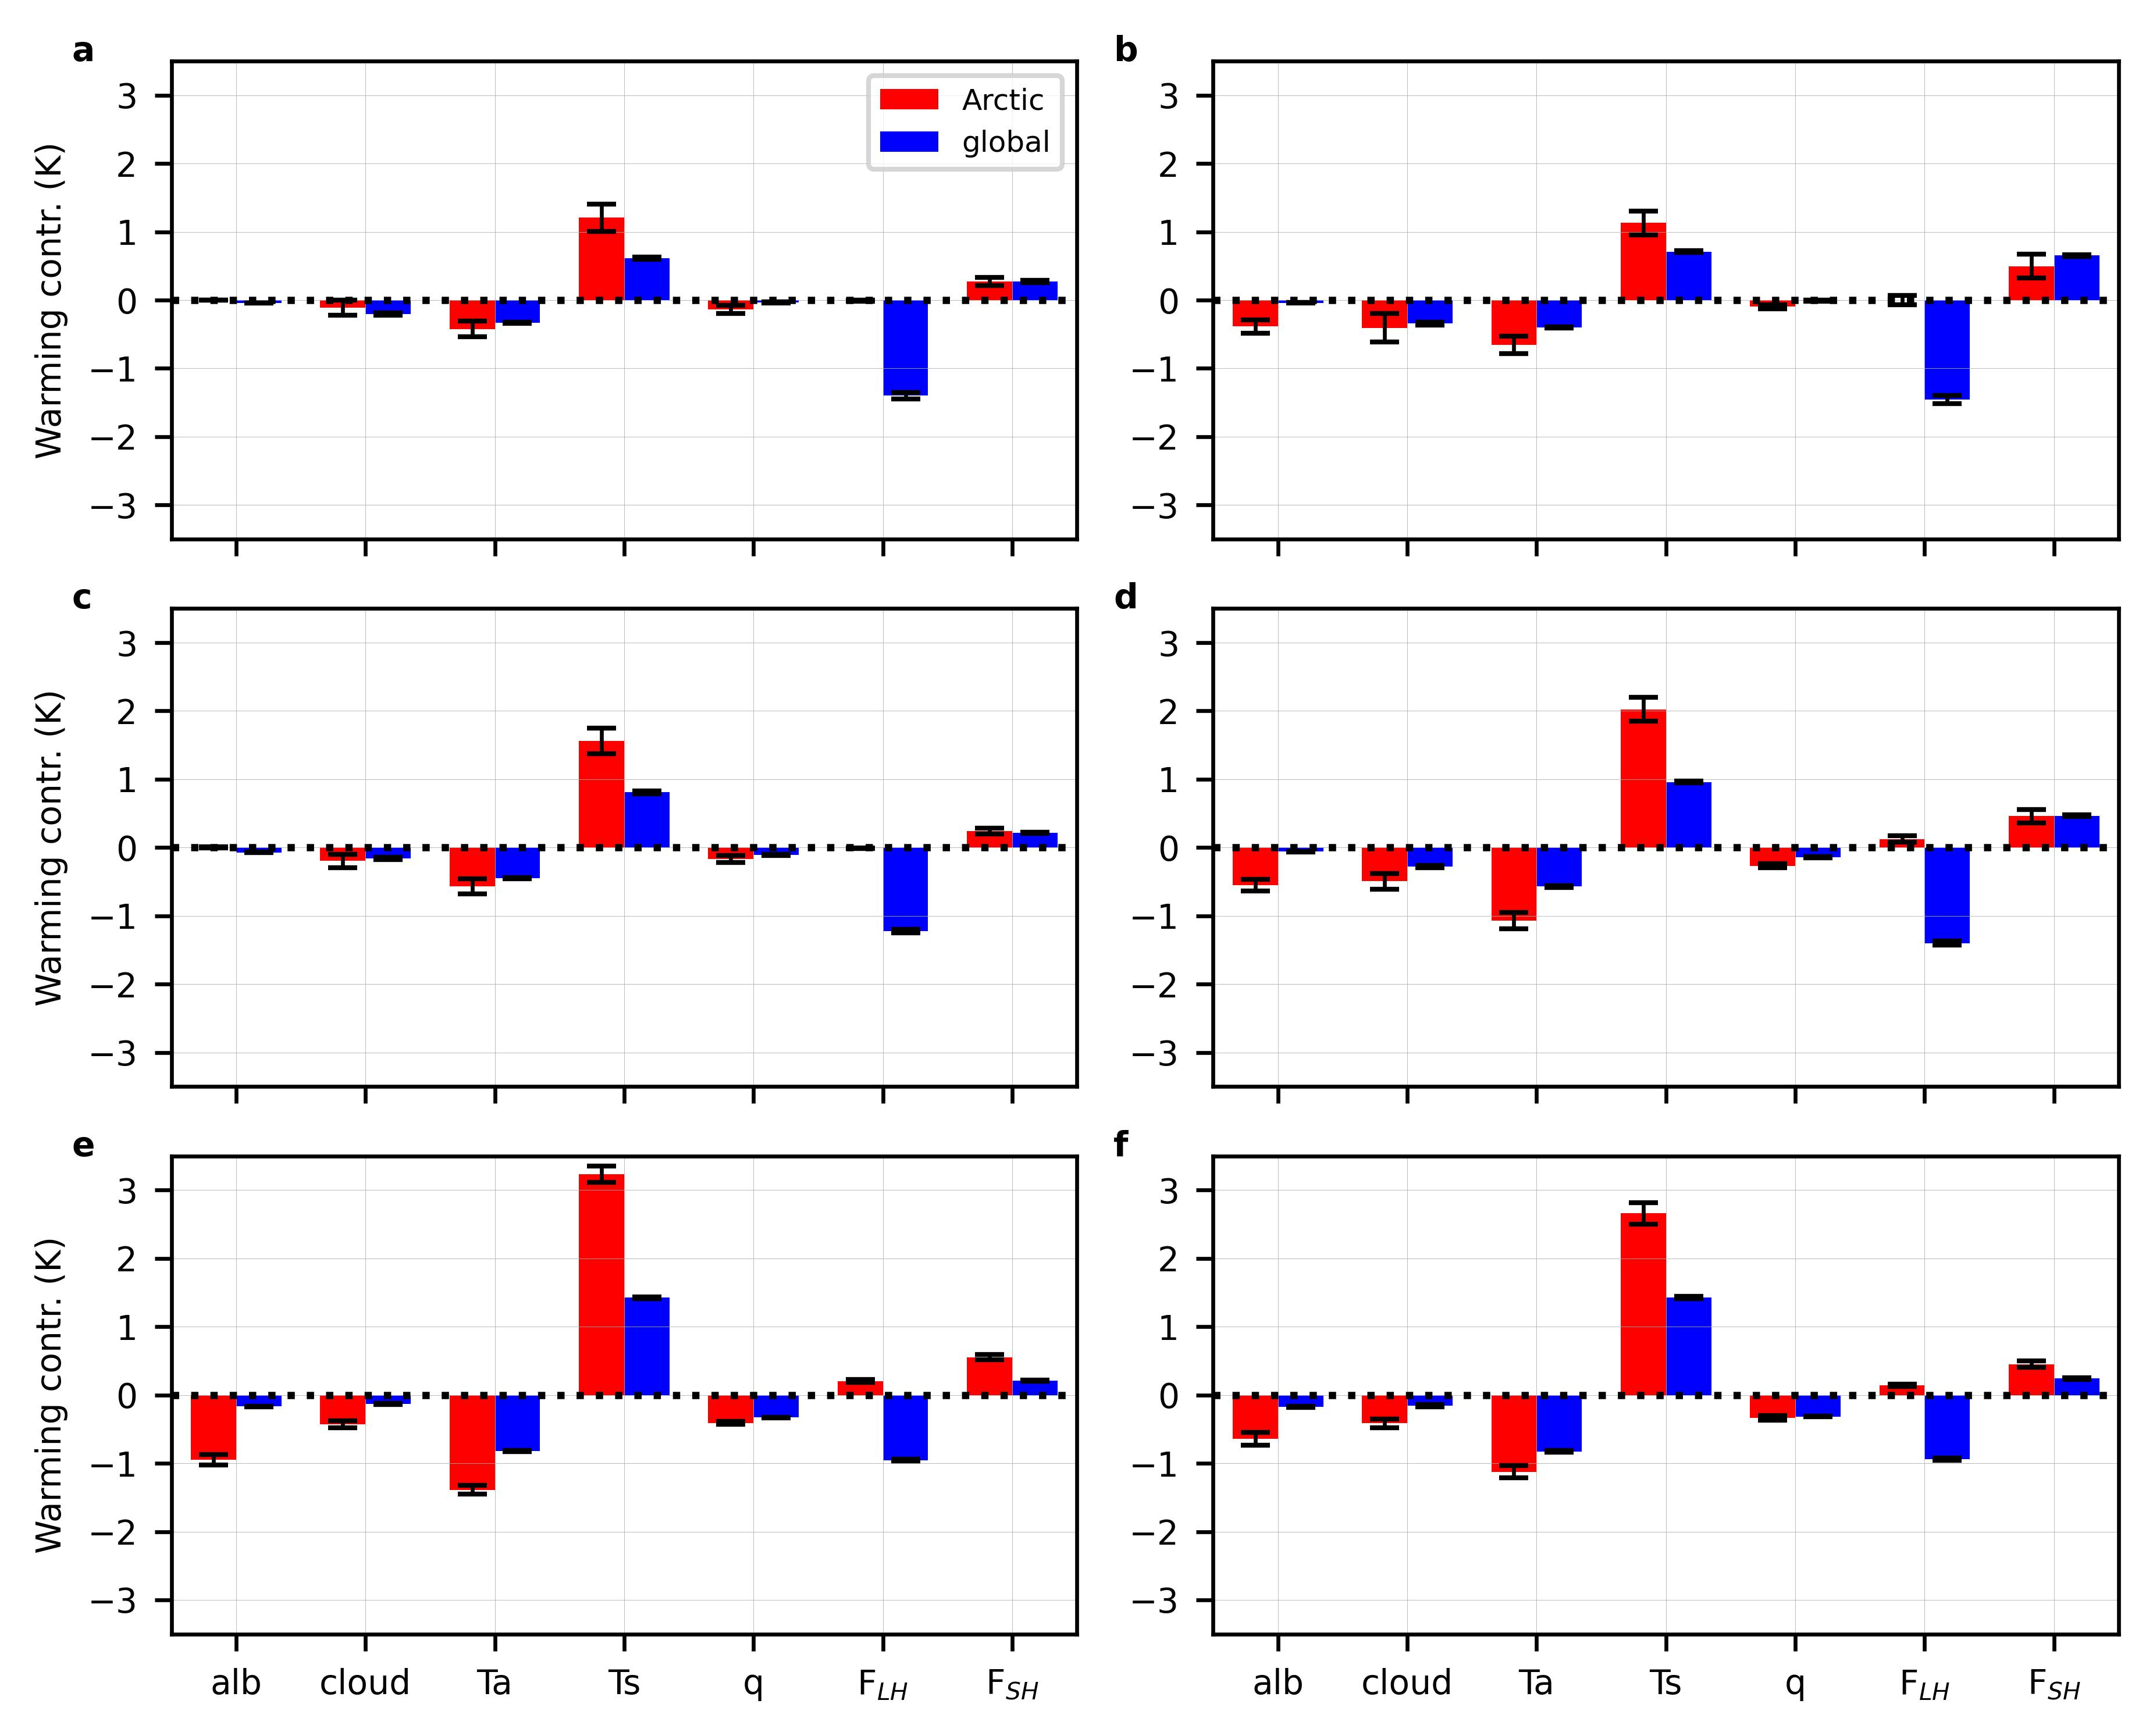

In [25]:
x = np.arange(len(labels))
width=0.35
args={'linewidth':0.8}

fig, axes = plt.subplots(ncols=2,nrows=3,sharey=True,sharex=True,figsize=(6.27,5),dpi=600)
axes[0,0].bar(x - width/2, arc_means_jan_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,0].bar(x + width/2, glb_means_jan_1mo, width, label='global',color='blue',
              yerr=glb_err_jan_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x - width/2, arc_means_jul_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x + width/2, glb_means_jul_1mo, width, label='global',color='blue',
              yerr=glb_err_jul_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x - width/2, arc_means_jan_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x + width/2, glb_means_jan_3mo, width, label='global',color='blue',
              yerr=glb_err_jan_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x - width/2, arc_means_jul_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x + width/2, glb_means_jul_3mo, width, label='global',color='blue',
              yerr=glb_err_jul_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x - width/2, arc_means_jan_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jan_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x + width/2, glb_means_jan_1yr, width, label='global',color='blue',
              yerr=glb_err_jan_1yr,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x - width/2, arc_means_jul_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jul_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x + width/2, glb_means_jul_1yr, width, label='global',color='blue',
              yerr=glb_err_jul_1yr,align='center', ecolor='black', capsize=3,error_kw=args)

axes[0,0].legend(fontsize=6)
axes[0,1].set_xticks(x,labels)

for ax in axes.flatten():
    ax.set_xlim([-0.5,6.5])
    ax.set_ylim([-3.5,3.5])
    ax.tick_params(axis='x',labelsize=7)
    ax.tick_params(axis='y',labelsize=7)
    ax.grid(linewidth=0.1)
    ax.tick_params(labelleft=True)
    ax.hlines(-0,-0.5,7.5,color='black',linestyle=':')

axes[0,0].set_ylabel('Warming contr. (K)',fontsize=7)
axes[1,0].set_ylabel('Warming contr. (K)',fontsize=7)
axes[2,0].set_ylabel('Warming contr. (K)',fontsize=7)
plt.tight_layout()

letters=['a','b','c','d','e','f']
for i,ax in enumerate(axes.flatten()):
    ax.text(-0.11,1,letters[i],transform=ax.transAxes,fontsize=7,fontweight='bold')

plt.savefig('FigS7_Fsfc_bar_chart_land_only.jpg',dpi=600,bbox_inches='tight')
plt.show()

### Ocean only

In [26]:
# january
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/ocean_only/b40.1850.cam5-lens.01.arc_'
alb_arc_jan = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_arc_jan = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_arc_jan = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_arc_jan = cloud_LW_arc_jan + cloud_SW_arc_jan
lh_arc_jan = xr.open_dataarray(lead+'dLHFLX.nc')
Fsfc_arc_jan = xr.open_dataarray(lead+'Fsfc.nc')
Ta_arc_jan = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_arc_jan = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_arc_jan = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_arc_jan = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_arc_jan = q_LW_arc_jan + q_SW_arc_jan
sh_arc_jan = xr.open_dataarray(lead+'dSHFLX.nc')

# january
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.01.glb_'
alb_glb_jan = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_glb_jan = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_glb_jan = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_glb_jan = cloud_LW_glb_jan + cloud_SW_glb_jan
Fsfc_glb_jan = xr.open_dataarray(lead+'Fsfc.nc')
lh_glb_jan = xr.open_dataarray(lead+'dLHFLX.nc')
Ta_glb_jan = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_glb_jan = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_glb_jan = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_glb_jan = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_glb_jan = q_LW_glb_jan + q_SW_glb_jan
sh_glb_jan = xr.open_dataarray(lead+'dSHFLX.nc')

In [27]:
# july
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/ocean_only/b40.1850.cam5-lens.07.arc_'
alb_arc_jul = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_arc_jul = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_arc_jul = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_arc_jul = cloud_LW_arc_jul + cloud_SW_arc_jul
Fsfc_arc_jul = xr.open_dataarray(lead+'Fsfc.nc')
lh_arc_jul = xr.open_dataarray(lead+'dLHFLX.nc')
Ta_arc_jul = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_arc_jul = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_arc_jul = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_arc_jul = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_arc_jul = q_LW_arc_jul + q_SW_arc_jul
sh_arc_jul = xr.open_dataarray(lead+'dSHFLX.nc')

# july
lead = '/dx02/janoski/cesm/spat_avg_feedbacks/norm_feedbacks/all/b40.1850.cam5-lens.07.glb_'
alb_glb_jul = -1 * xr.open_dataarray(lead+'alb_sfc.nc')
cloud_LW_glb_jul = -1 * xr.open_dataarray(lead+'cloud_LW_sfc.nc')
cloud_SW_glb_jul = -1 * xr.open_dataarray(lead+'cloud_SW_sfc.nc')
cloud_glb_jul = cloud_LW_glb_jul + cloud_SW_glb_jul
Fsfc_glb_jul = xr.open_dataarray(lead+'Fsfc.nc')
lh_glb_jul = xr.open_dataarray(lead+'dLHFLX.nc')
Ta_glb_jul = -1 * xr.open_dataarray(lead+'Ta_tropo_sfc.nc')
Ts_glb_jul = -1 * xr.open_dataarray(lead+'Ts_tropo_sfc.nc')
q_LW_glb_jul = -1 * xr.open_dataarray(lead+'q_LW_tropo_sfc.nc')
q_SW_glb_jul = -1 * xr.open_dataarray(lead+'q_SW_tropo_sfc.nc')
q_glb_jul = q_LW_glb_jul + q_SW_glb_jul
sh_glb_jul = xr.open_dataarray(lead+'dSHFLX.nc')

In [28]:
arc_vars_jan = [alb_arc_jan,cloud_arc_jan,Ta_arc_jan,Ts_arc_jan,
               q_arc_jan,lh_arc_jan,sh_arc_jan]
glb_vars_jan = [alb_glb_jan,cloud_glb_jan,Ta_glb_jan,Ts_glb_jan,
               q_glb_jan,lh_glb_jan,sh_glb_jan]
arc_vars_jul = [alb_arc_jul,cloud_arc_jul,Ta_arc_jul,Ts_arc_jul,
               q_arc_jul,lh_arc_jul,sh_arc_jul]
glb_vars_jul = [alb_glb_jul,cloud_glb_jul,Ta_glb_jul,Ts_glb_jul,
               q_glb_jul,lh_glb_jul,sh_glb_jul]
labels = ['alb','cloud','Ta','Ts','q',r'F$_{LH}$',r'F$_{SH}$']

################FIRST MONTH#########################
end = 31

arc_means_jan_1mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########THREE MONTHS#######################
end = 91

arc_means_jan_3mo = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_3mo = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_3mo = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_3mo = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_3mo = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_3mo = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_3mo = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_3mo = [get_spread(g,end=end) for g in glb_vars_jul]

###########FIRST YEAR#######################
end = 365

arc_means_jan_1yr = [get_mean(a,end=end) for a in arc_vars_jan]
glb_means_jan_1yr = [get_mean(g,end=end) for g in glb_vars_jan]
arc_err_jan_1yr = [get_spread(a,end=end) for a in arc_vars_jan]
glb_err_jan_1yr = [get_spread(g,end=end) for g in glb_vars_jan]

arc_means_jul_1yr = [get_mean(a,end=end) for a in arc_vars_jul]
glb_means_jul_1yr = [get_mean(g,end=end) for g in glb_vars_jul]
arc_err_jul_1yr = [get_spread(a,end=end) for a in arc_vars_jul]
glb_err_jul_1yr = [get_spread(g,end=end) for g in glb_vars_jul]

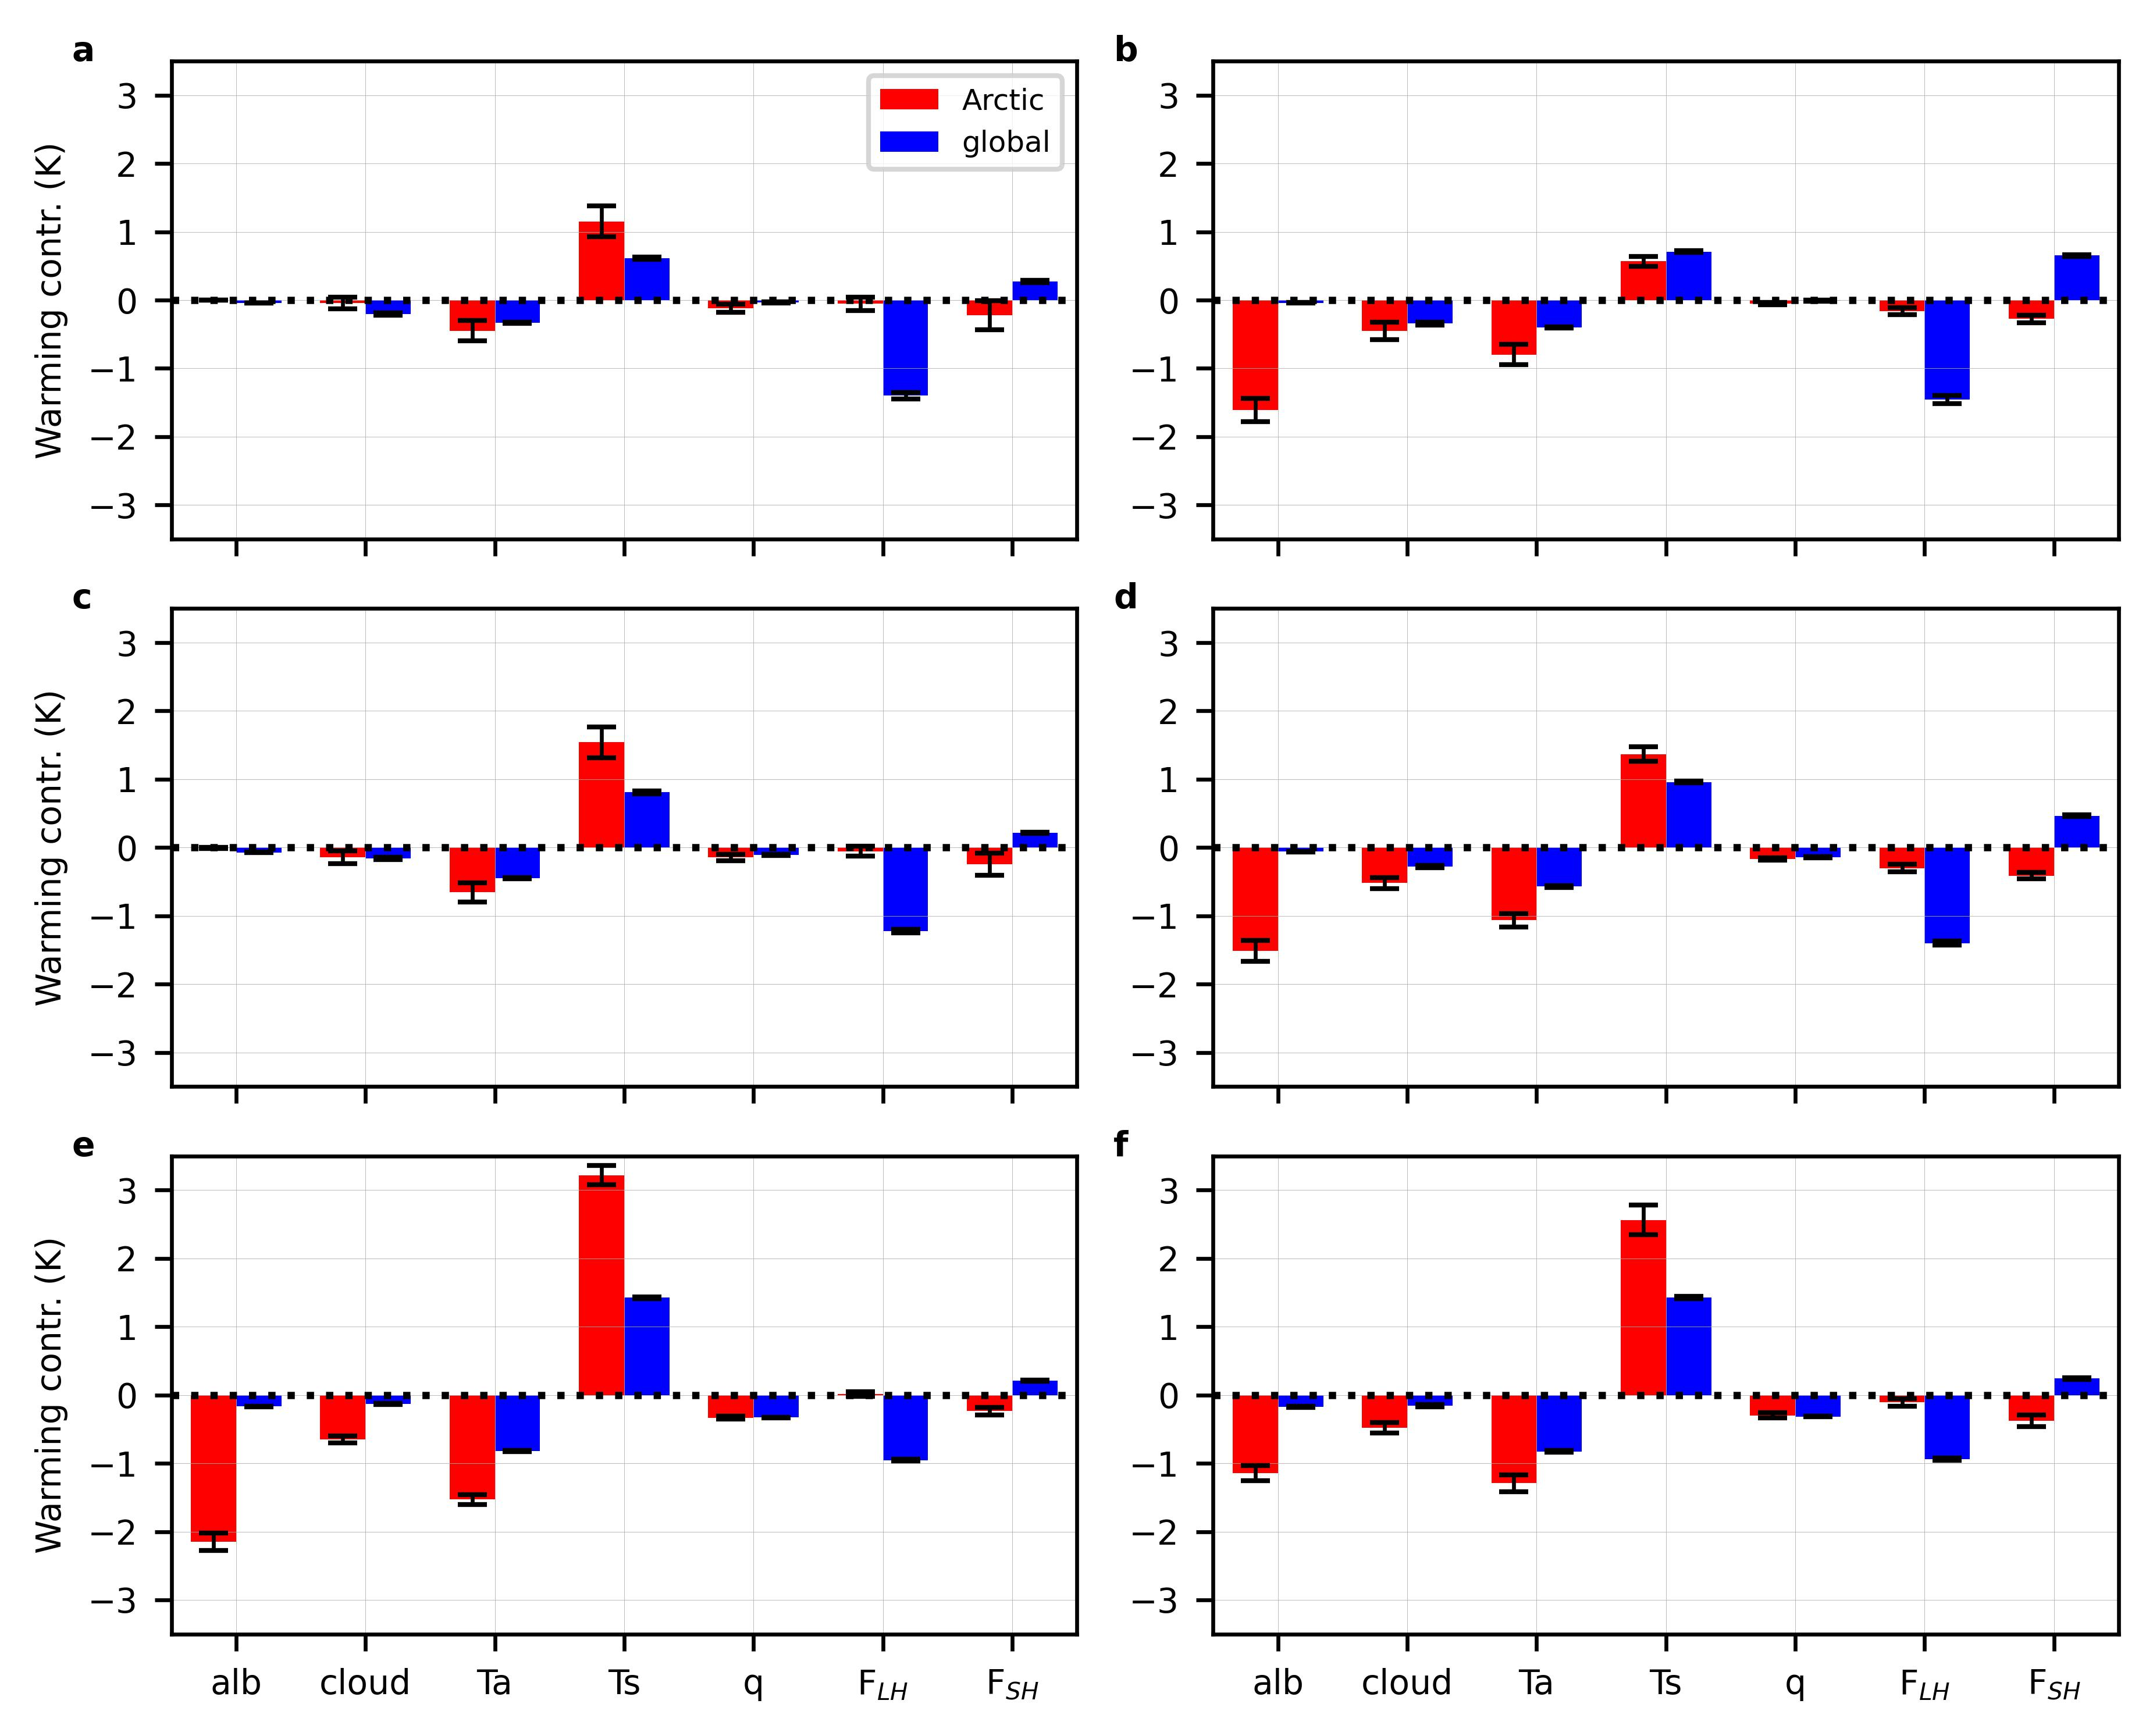

In [29]:
x = np.arange(len(labels))
width=0.35
args={'linewidth':0.8}

fig, axes = plt.subplots(ncols=2,nrows=3,sharey=True,sharex=True,figsize=(6.27,5),dpi=600)
axes[0,0].bar(x - width/2, arc_means_jan_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,0].bar(x + width/2, glb_means_jan_1mo, width, label='global',color='blue',
              yerr=glb_err_jan_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x - width/2, arc_means_jul_1mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_1mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[0,1].bar(x + width/2, glb_means_jul_1mo, width, label='global',color='blue',
              yerr=glb_err_jul_1mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x - width/2, arc_means_jan_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jan_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,0].bar(x + width/2, glb_means_jan_3mo, width, label='global',color='blue',
              yerr=glb_err_jan_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x - width/2, arc_means_jul_3mo, width, label='Arctic',color='red',
              yerr=arc_err_jul_3mo,align='center',ecolor='black', capsize=3,error_kw=args)
axes[1,1].bar(x + width/2, glb_means_jul_3mo, width, label='global',color='blue',
              yerr=glb_err_jul_3mo,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x - width/2, arc_means_jan_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jan_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,0].bar(x + width/2, glb_means_jan_1yr, width, label='global',color='blue',
              yerr=glb_err_jan_1yr,align='center', ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x - width/2, arc_means_jul_1yr, width, label='Arctic',color='red',
              yerr=arc_err_jul_1yr,align='center',ecolor='black', capsize=3,error_kw=args)
axes[2,1].bar(x + width/2, glb_means_jul_1yr, width, label='global',color='blue',
              yerr=glb_err_jul_1yr,align='center', ecolor='black', capsize=3,error_kw=args)

axes[0,0].legend(fontsize=6)
axes[0,1].set_xticks(x,labels)

for ax in axes.flatten():
    ax.set_xlim([-0.5,6.5])
    ax.set_ylim([-3.5,3.5])
    ax.tick_params(axis='x',labelsize=7)
    ax.tick_params(axis='y',labelsize=7)
    ax.grid(linewidth=0.1)
    ax.tick_params(labelleft=True)
    ax.hlines(-0,-0.5,7.5,color='black',linestyle=':')

axes[0,0].set_ylabel('Warming contr. (K)',fontsize=7)
axes[1,0].set_ylabel('Warming contr. (K)',fontsize=7)
axes[2,0].set_ylabel('Warming contr. (K)',fontsize=7)
plt.tight_layout()

letters=['a','b','c','d','e','f']
for i,ax in enumerate(axes.flatten()):
    ax.text(-0.11,1,letters[i],transform=ax.transAxes,fontsize=7,fontweight='bold')

plt.savefig('FigS8_Fsfc_bar_chart_ocean_only.jpg',dpi=600,bbox_inches='tight')
plt.show()